In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [2]:
data_path = Path("data/long/300cm_220508-132854.json")
with open(data_path, "r") as fd:
    data_raw = json.load(fd)

In [3]:
fs = data_raw["fs"]
dist = data_raw["dist"]
data = np.array(data_raw["data"])

In [4]:
10**(38/20)

79.43282347242814

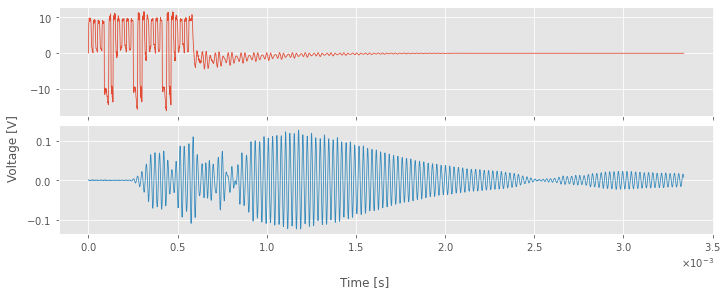

In [10]:
plt.close("all")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,4), sharex=True)
# ax2.grid(False)

C1, C2 = data[4].T.copy()

cut = (abs(C2[1:] - C2[:-1]) > 0.1).nonzero()[0][0]

C1 = C1[cut+700:-5000+700]
C2 = C2[cut:-5000]
x = np.arange(len(C1)) / fs

# Scale down and remove mean
C1 -= C1.mean()
C1 /= 10

ax1.plot(x, C2, c="C0")
ax2.plot(x, C1, c="C1")

fig.supxlabel("Time [s]")
fig.supylabel("Voltage [V]")

outpath = Path("plot", "sender_kond.pdf")
outpath.parent.mkdir(exist_ok=True)
fig.savefig(outpath)